In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [ ]:
database_file = ''
connection = sqlite3.connect(database_file)
query = "SELECT * FROM your_table;"

In [18]:
crime_df = pd.read_csv('/workspaces/detroit-crime-property-analysis/Israel/data/CrimeData_Chicago.csv')
house_df = pd.read_csv('/workspaces/detroit-crime-property-analysis/Israel/data/HomeHarvest_Chicago.csv')

In [19]:
missing_percentage = (house_df.isnull().sum() / len(house_df)) * 100
print(missing_percentage)

property_url       0.000000
mls               19.839508
mls_id            19.839508
status             0.000000
style              0.013875
street             0.002313
unit              48.348828
city               0.000000
state              0.000000
zip_code           0.002313
beds              13.357384
full_baths        12.571111
half_baths        78.733639
sqft              35.534897
year_built        18.979233
days_on_mls       24.499329
list_price        19.853383
list_date         19.839508
sold_price         0.000000
last_sold_date     0.000000
lot_sqft          54.837889
price_per_sqft    35.611211
latitude           0.992091
longitude          0.992091
stories           24.547893
hoa_fee           37.264696
parking_garage    39.806207
primary_photo     14.374913
alt_photos        14.374913
dtype: float64


# Exploring Missing Values


In [20]:
correlation = house_df[['sold_price', 'hoa_fee']].corr()
print(correlation)

            sold_price   hoa_fee
sold_price    1.000000  0.320199
hoa_fee       0.320199  1.000000


/tmp/ipykernel_26433/798923254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_values_counts = house_df[house_df['hoa_fee'].isnull()].groupby('sold_price_bins').size()


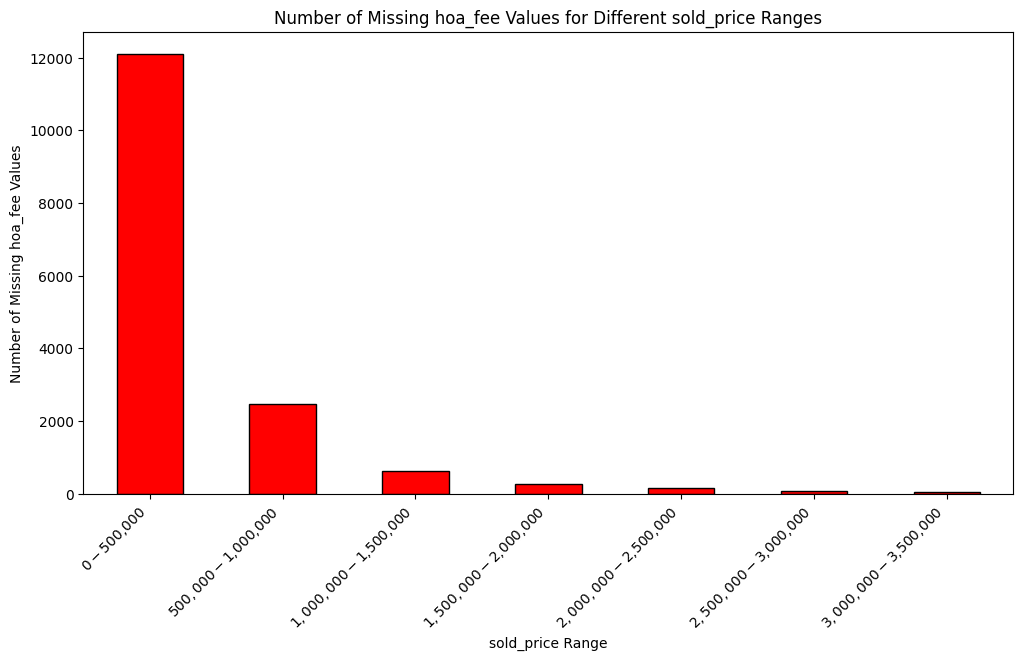

In [21]:
# Set the bins for 'sold_price'
bins = np.arange(0, 4000000, 500000)

# Create a new column in house_df to represent the bins
house_df['sold_price_bins'] = pd.cut(house_df['sold_price'], bins=bins, include_lowest=True)

# Count the number of missing values for each bin
missing_values_counts = house_df[house_df['hoa_fee'].isnull()].groupby('sold_price_bins').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_values_counts.plot(kind='bar', color='red', edgecolor='black')

# Set x-axis ticks with readable price ranges
bin_labels = ['${:,.0f} - ${:,.0f}'.format(left, right) for left, right in zip(bins[:-1], bins[1:])]
plt.xticks(range(len(bins)-1), bin_labels, rotation=45, ha='right')

# Set plot labels and title
plt.xlabel('sold_price Range')
plt.ylabel('Number of Missing hoa_fee Values')
plt.title('Number of Missing hoa_fee Values for Different sold_price Ranges')

# Show the plot
plt.show()


Missing HOA Values are closely related to price. Lower property value Real Estate is less likely to have HOAs in general so this data doesn't contribute meaningfuly and can be safely dropped.

In [ ]:
house_df['unit'].info()
house_df['unit'].head()
house_df['unit'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 43242 entries, 0 to 43241
Series name: unit
Non-Null Count  Dtype 
--------------  ----- 
22335 non-null  object
dtypes: object(1)
memory usage: 338.0+ KB


unit
Apt 2         886
Apt 3         817
Apt 1         747
Unit 2        329
Unit 1        321
             ... 
Apt 2716        1
# 138           1
Apt 53F         1
# P453          1
Unit 602-3      1
Name: count, Length: 4356, dtype: int64

We already have the feature 'style' which describes the property and includes classification for apartment. The specific apartment number isn't of great use to us at the moment and can be safely dropped.

/tmp/ipykernel_26433/2745123937.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_values_counts = house_df[house_df['half_baths'].isnull()].groupby('sold_price_bins').size()


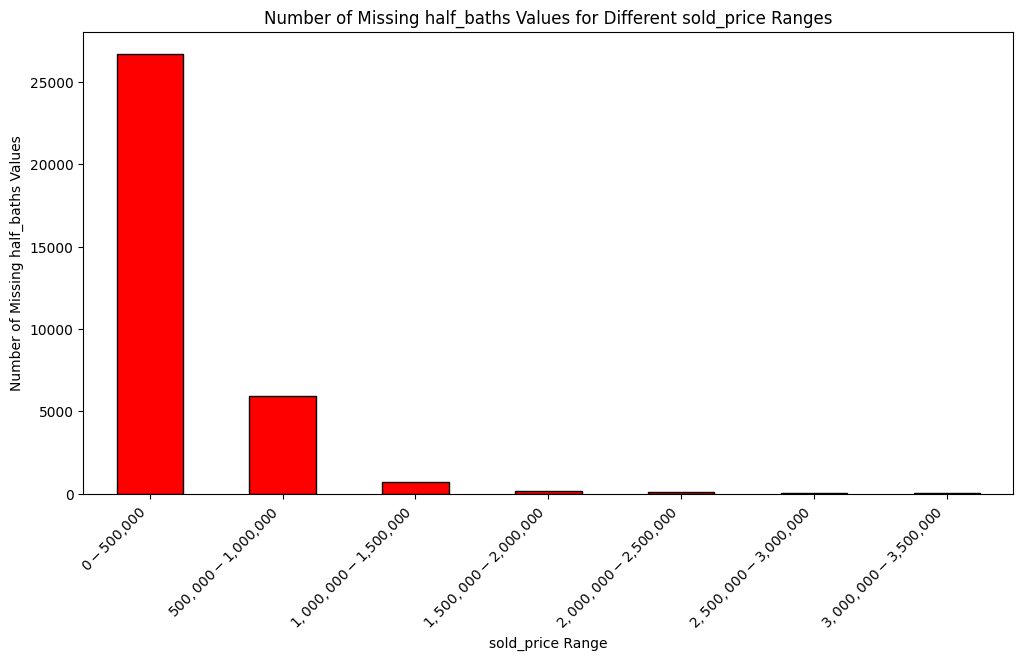

In [25]:
# Set the bins for 'sold_price'
bins = np.arange(0, 4000000, 500000)

# Create a new column in house_df to represent the bins
house_df['sold_price_bins'] = pd.cut(house_df['sold_price'], bins=bins, include_lowest=True)

# Count the number of missing values for each bin
missing_values_counts = house_df[house_df['half_baths'].isnull()].groupby('sold_price_bins').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_values_counts.plot(kind='bar', color='red', edgecolor='black')

# Set x-axis ticks with readable price ranges
bin_labels = ['${:,.0f} - ${:,.0f}'.format(left, right) for left, right in zip(bins[:-1], bins[1:])]
plt.xticks(range(len(bins)-1), bin_labels, rotation=45, ha='right')

# Set plot labels and title
plt.xlabel('sold_price Range')
plt.ylabel('Number of Missing half_baths Values')
plt.title('Number of Missing half_baths Values for Different sold_price Ranges')

# Show the plot
plt.show()

Similar to missing values for 'hoa_fees', 'half_baths' likely doesn't impact crime rates except as a bad substitute for property value and can safely be dropped. Likewise: 'full_baths', and 'beds' 

In [28]:
cleaned_house_df = house_df.drop(columns=['hoa_fee','unit','half_baths','full_baths', 'beds', 'mls', 'mls_id', 'stories','parking_garage','primary_photo','alt_photos'])
cleaned_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43242 entries, 0 to 43241
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   property_url     43242 non-null  object  
 1   status           43242 non-null  object  
 2   style            43236 non-null  object  
 3   street           43241 non-null  object  
 4   city             43242 non-null  object  
 5   state            43242 non-null  object  
 6   zip_code         43241 non-null  float64 
 7   sqft             27876 non-null  float64 
 8   year_built       35035 non-null  float64 
 9   days_on_mls      32648 non-null  float64 
 10  list_price       34657 non-null  float64 
 11  list_date        34663 non-null  object  
 12  sold_price       43242 non-null  int64   
 13  last_sold_date   43242 non-null  object  
 14  lot_sqft         19529 non-null  float64 
 15  price_per_sqft   27843 non-null  float64 
 16  latitude         42813 non-null  float64

In [29]:
missing_percentage = (cleaned_house_df.isnull().sum() / len(house_df)) * 100
print(missing_percentage)

property_url        0.000000
status              0.000000
style               0.013875
street              0.002313
city                0.000000
state               0.000000
zip_code            0.002313
sqft               35.534897
year_built         18.979233
days_on_mls        24.499329
list_price         19.853383
list_date          19.839508
sold_price          0.000000
last_sold_date      0.000000
lot_sqft           54.837889
price_per_sqft     35.611211
latitude            0.992091
longitude           0.992091
sold_price_bins     0.952777
dtype: float64


# Deeper dive into remaining missing values

In [38]:
style_counts = cleaned_house_df['style'].value_counts()

style
CONDOS           16847
SINGLE_FAMILY    12994
MULTI_FAMILY      5905
CONDO             3839
TOWNHOMES         1588
OTHER             1333
LAND               725
COMMERCIAL           5
Name: count, dtype: int64

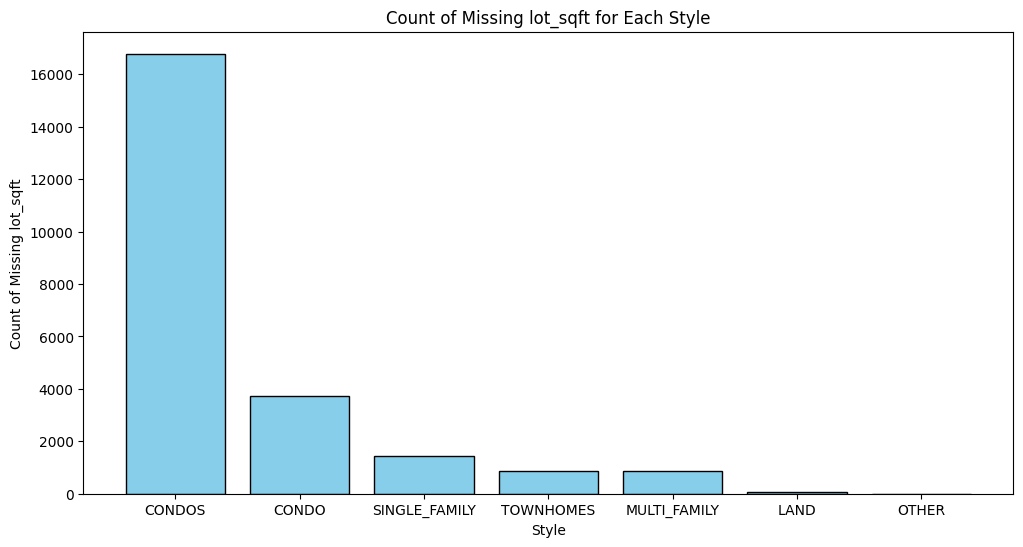

In [39]:
missing_lot_sqft = cleaned_house_df[cleaned_house_df['lot_sqft'].isnull()]

# Create a bar plot of missing 'lot_sqft' values for each 'style'
plt.figure(figsize=(12, 6))
plt.bar(missing_lot_sqft['style'].value_counts().index, missing_lot_sqft['style'].value_counts().values,
        color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Style')
plt.ylabel('Count of Missing lot_sqft')
plt.title('Count of Missing lot_sqft for Each Style')

# Show the plot
plt.show()